# K Means Clustering

Unsupervised Machine Learning

Based on tutorial at [Python Programming Tutorials](https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/).

May 2019

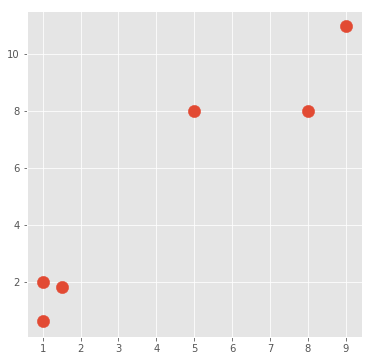

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = [6.0, 6.0]

A = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

colors = 10*["g","r","c","b","k"]

plt.scatter(A[:,0],A[:,1],s=150)
plt.show()

In [2]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        """Instantiate an object.
        
        Args:
        :k: int number of clusters 
        :tol: float tolerance; we are optimized if centroid is not 
        moving more than this value
        :max_iter: int limit number of cycles
        """
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self,data):
        """Fit the data.

        Args
        :data: array dataset
        """
        self.centroids = {}

        # assigns starting centroids as first two data samples
        # TODO implement shuffle for random start
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            
            # calculate distances
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) \
                             for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0)>self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
                    
            if optimized:
                break
                
    def predict(self,data):
        """To predict cluster for new data.
        
        Args
        :data: array dataset        
        """
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) \
                     for centroid in self.centroids]
        classification = distances.index(min(distances))    
        return classification

### Test Fit

453.3333333333334
102.72108843537411


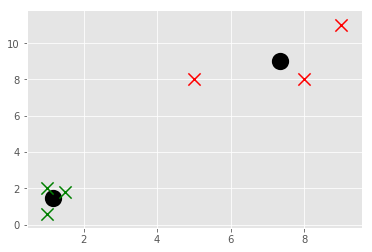

In [3]:
clf = K_Means()
clf.fit(A)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],
               marker="o",color="k",s=150,linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker="x",s=150,color=color,linewidths=5)
        
plt.show()

### Test Prediction

453.3333333333334
102.72108843537411


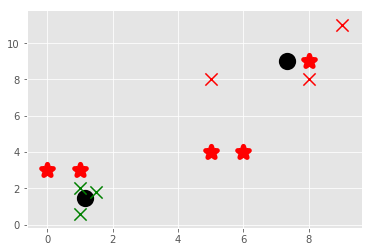

In [4]:
clf = K_Means()
clf.fit(A)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],
               marker="o",color="k",s=150,linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker="x",color=color,s=150,linewidths=5)
        
B = np.array([[1,3],[8,9],[0,3],[5,4],[6,4]])

for p in B:
    classification = clf.predict(p)
    plt.scatter(p[0],p[1],marker="*",color=colors[classification],s=150,linewidths=5)
    
plt.show()

In [5]:
C = np.concatenate((A,B))

In [6]:
C

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ],
       [ 1. ,  3. ],
       [ 8. ,  9. ],
       [ 0. ,  3. ],
       [ 5. ,  4. ],
       [ 6. ,  4. ]])

In [8]:
clf = K_Means()
clf.fit(C)

484.7222222222223
13.0
52.10727969348656


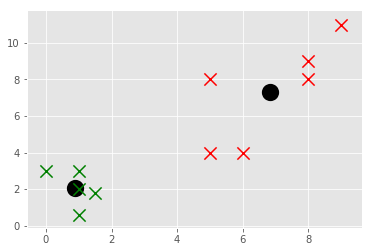

In [9]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],
               marker="o",color="k",s=150,linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker="x",color=color,s=150,linewidths=5)
        
plt.show()